In [ ]:
import tensorflow


In [ ]:
import tensorflow as tf


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("Set3")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Covid Data.csv")
df = pd.read_csv("Covid Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

* **As is indicated by the information above, the data contains no null values**
* **Although it says that some of the features are type int64, most of those features are boolean variables(1 for no & 2 for yes).** 
* **Values 97 & 98 indicate the value is null in boolean variables of this dataset.**

# DATA ANALYSIS

array([[<AxesSubplot: title={'center': 'ICU'}>,
        <AxesSubplot: title={'center': 'PNEUMONIA'}>,
        <AxesSubplot: title={'center': 'DIABETES'}>,
        <AxesSubplot: title={'center': 'COPD'}>],
       [<AxesSubplot: title={'center': 'ASTHMA'}>,
        <AxesSubplot: title={'center': 'INMSUPR'}>,
        <AxesSubplot: title={'center': 'HIPERTENSION'}>,
        <AxesSubplot: title={'center': 'OTHER_DISEASE'}>],
       [<AxesSubplot: title={'center': 'CARDIOVASCULAR'}>,
        <AxesSubplot: title={'center': 'OBESITY'}>,
        <AxesSubplot: title={'center': 'RENAL_CHRONIC'}>,
        <AxesSubplot: title={'center': 'TOBACCO'}>],
       [<AxesSubplot: title={'center': 'INTUBED'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

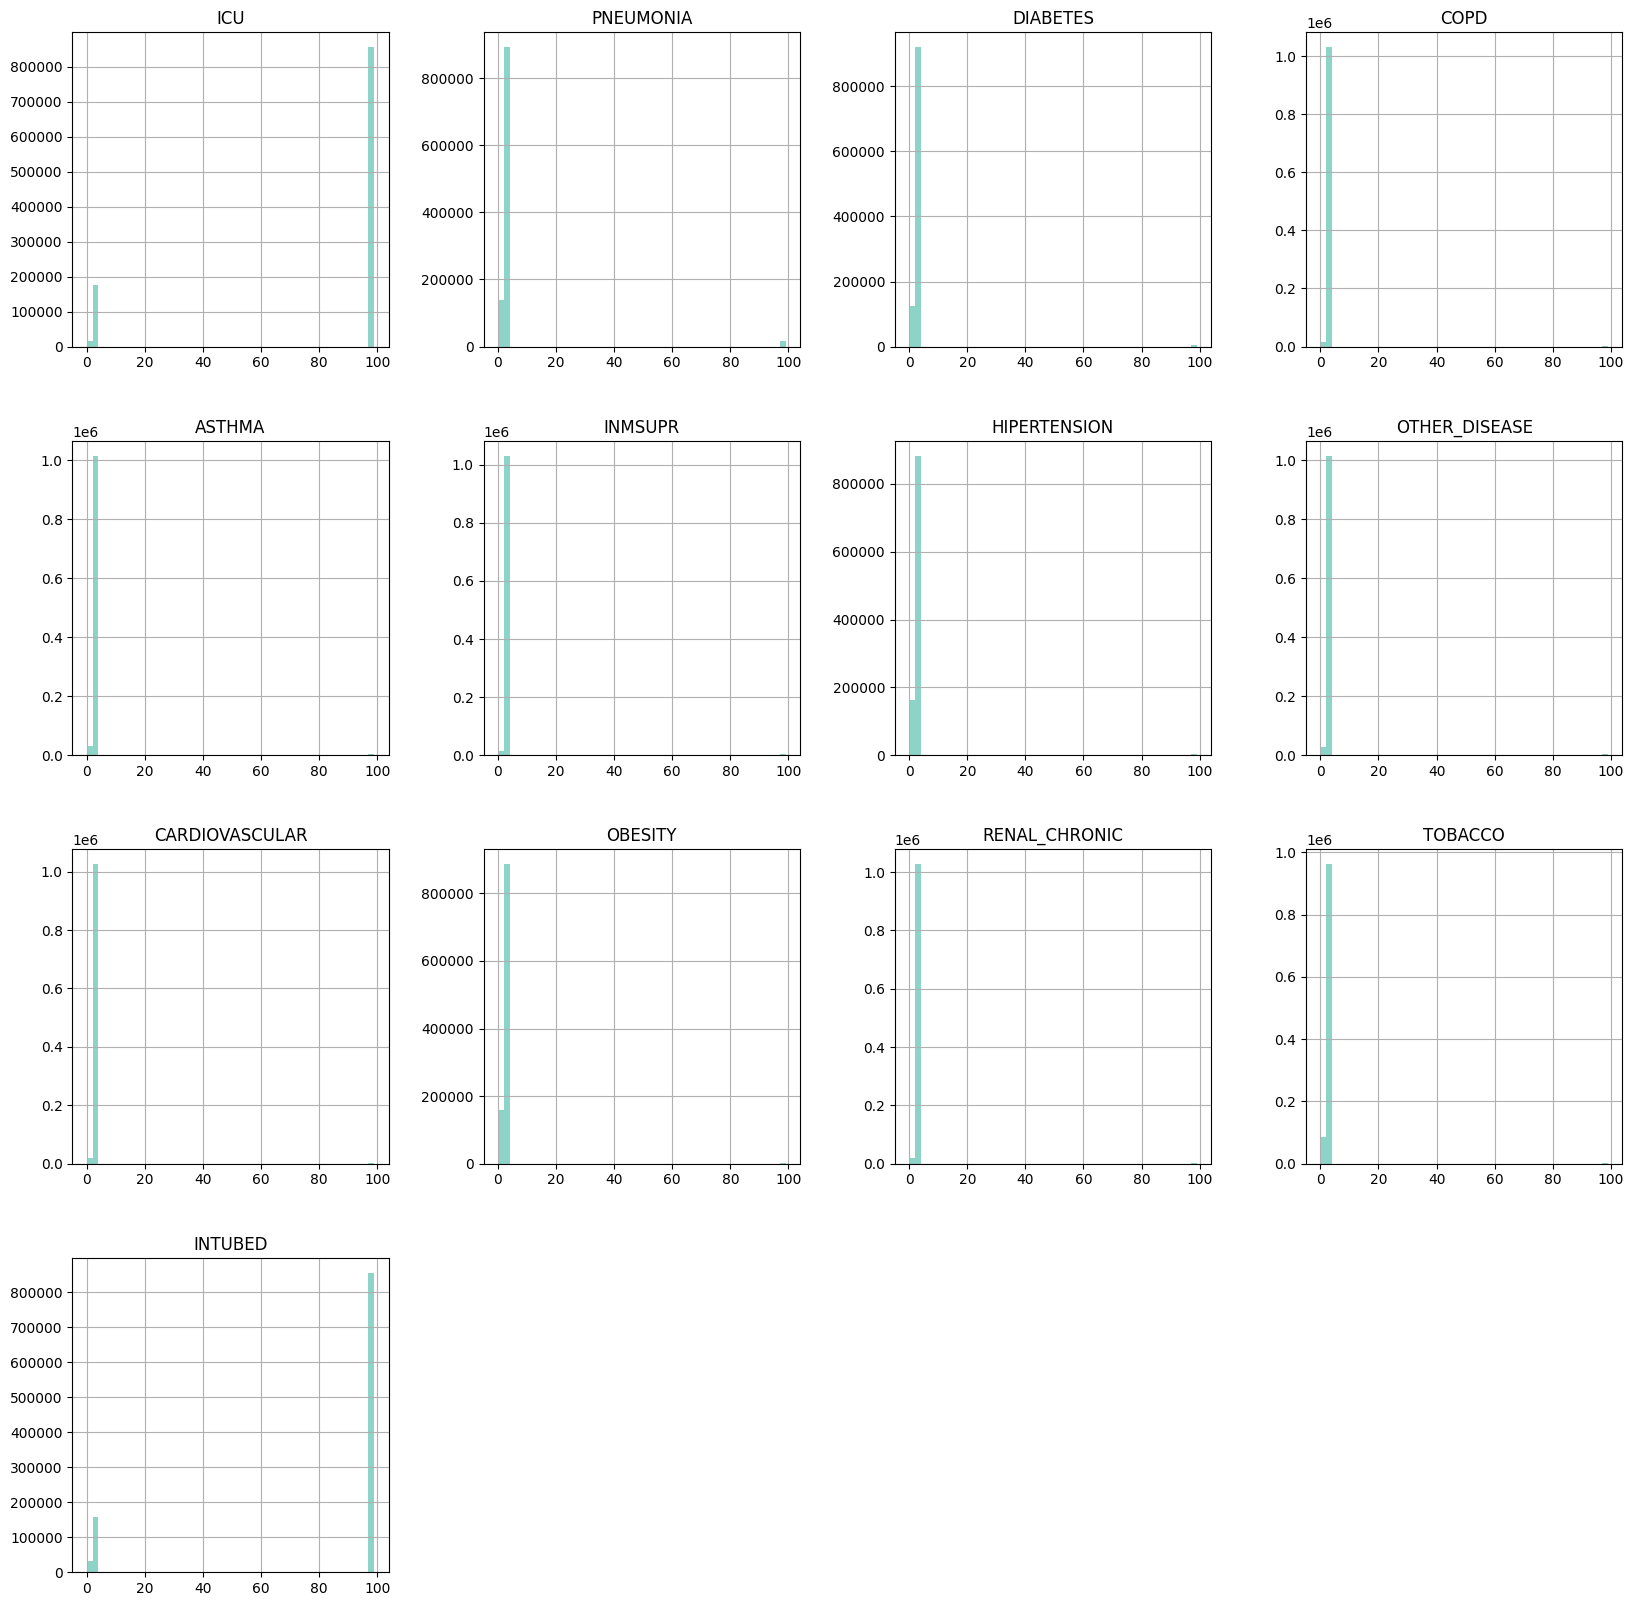

In [3]:
categorical_attrib = ["ICU","PNEUMONIA","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","INTUBED"]
df.hist(column = categorical_attrib, figsize = (20,20),bins=[0,2,4,97,99])

* **note that values 97-98 are considered null in the categories of this dataset.**
* **The above histograms show that null values are very few compared to the boolean data in all the attributes except for "INTUBED" and "ICU" which have too many null values.**

In [4]:
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
df.drop("INTUBED", axis = 1, inplace = True)
df.drop("ICU", axis = 1, inplace = True)
#drop date value
df.drop("DATE_DIED", axis = 1, inplace = True)

* **the observations containing null values for all attributes except "INTUBED" and "ICU" were removed due to their scarcity rather than dropping the entire columns.**
* **"INTUBED" and "ICU" columns were dropped because they contain too many null values**

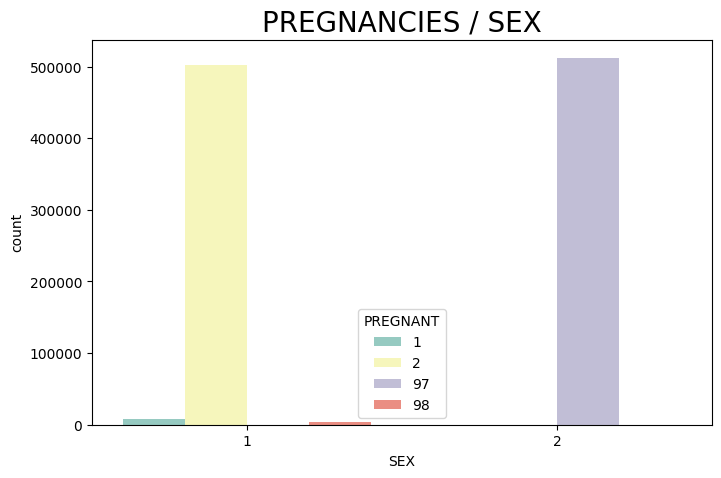

In [5]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df,x = df.SEX, hue = df.PREGNANT)
plt.title("PREGNANCIES / SEX", fontsize = 20);

* **Note that 98 means null values for female and 97 means null values for males.** 
* **values containing 97(null) will be replaced by 2(no) as men cant give birth.**
* **observations containing 98(null) values for females will be removed.**

In [6]:
df.PREGNANT = df.PREGNANT.replace(97, 2)
df = df[(df.PREGNANT == 1)|(df.PREGNANT == 2)]

**1-2-3 means COVID and 4-5-6-7 means not COVID. The goal is to classify whether a patient has covid or not which is a binary classification problem so we will convert the output data as follows.**

In [7]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 0)

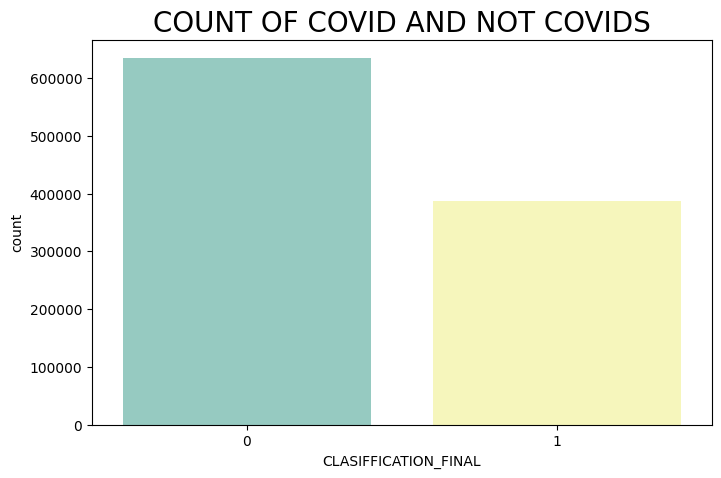

In [8]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = df.CLASIFFICATION_FINAL)
plt.title("COUNT OF COVID AND NOT COVIDS", fontsize = 20);

# DATA PREPARATION

In [30]:
x = df.drop("CLASIFFICATION_FINAL", axis = 1)
x = x.values
y = df["CLASIFFICATION_FINAL"]
y = y.values

In [33]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)

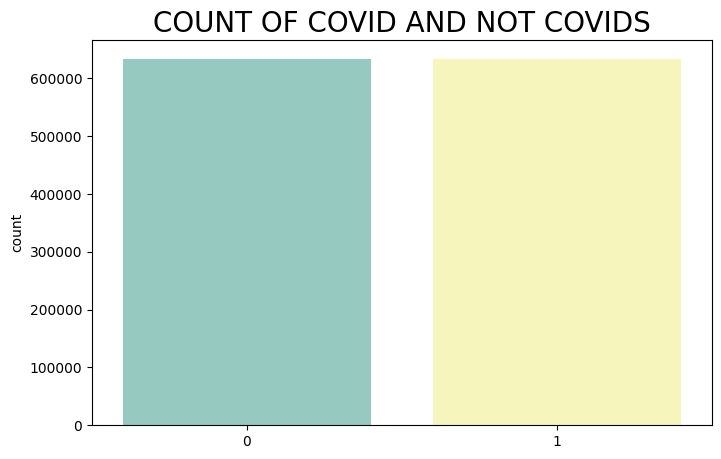

In [34]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = y)
plt.title("COUNT OF COVID AND NOT COVIDS", fontsize = 20);

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**"AGE" feature has a different scale compared to the rest of the features which are binary, Feature scaling would improve some models' performances.**

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)
#show final training examples
x_train[1:4,:],y_train[0:10]

(array([[ 0.75126703,  0.82342693,  0.98475032, -0.50869654,  0.42068308,
          1.40229958,  0.08767555,  0.38126341,  0.12020951,  0.17362205,
          0.11473207,  0.44211869,  0.16428726,  0.14307586,  0.4357733 ,
          0.13629345,  0.29393633],
        [ 0.75126703,  0.82342693,  0.98475032, -0.50869654,  0.42068308,
         -1.16470364,  0.08767555,  0.38126341,  0.12020951,  0.17362205,
          0.11473207,  0.44211869,  0.16428726,  0.14307586,  0.4357733 ,
          0.13629345, -3.40209733],
        [-1.33108464, -0.24699867,  0.98475032, -0.50869654,  0.42068308,
          0.98441534,  0.08767555,  0.38126341,  0.12020951,  0.17362205,
          0.11473207,  0.44211869,  0.16428726,  0.14307586,  0.4357733 ,
          0.13629345,  0.29393633]]),
 array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1]))

# LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()

log_classifier.fit(x_train, y_train)

pred = log_classifier.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

**Checking Logistic Regression Model's accuracy and AUC score**

In [39]:
print("Logistic Regression Model's accuracy score is "+str(accuracy_score(pred, y_test)))
print("Logistic Regression Model's AUC score is "+str(roc_auc_score(pred, y_test)))


Logistic Regression Model's accuracy score is 0.5944975290900063
Logistic Regression Model's AUC score is 0.6014512310537659


**Checking Recall**


***Recall = TP / (FN + TP)***
***Recall = 29000 / (18000 + 29000) = 0.62***

In [26]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64    147117
           1       0.46      0.63      0.53     85441

    accuracy                           0.59    232558
   macro avg       0.59      0.60      0.59    232558
weighted avg       0.63      0.59      0.60    232558



# SVM

In [40]:
from sklearn.svm import SVC 
svc = SVC(max_iter = 500)

In [41]:
svc.fit(x_train,y_train)
print("done")
pred = svc.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


done


In [42]:
print("SVM Model's accuracy score is "+str(accuracy_score(pred, y_test)))
print("SVM Model's AUC score is "+str(roc_auc_score(pred, y_test)))

SVM Model's accuracy score is 0.5016590958650025
SVM Model's AUC score is 0.5461951291645556


**Check Recall**

In [43]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67    378628
           1       0.01      0.59      0.01      2001

    accuracy                           0.50    380629
   macro avg       0.50      0.55      0.34    380629
weighted avg       0.99      0.50      0.66    380629



# NEURAL NETWORK

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

ModuleNotFoundError: No module named 'tensorflow'

In [11]:
model.fit(x_train,y_train,epochs = 10, batch_size = 20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
715383/715383 [==============================] - 83s 117us/sample - loss: 0.6353
Epoch 2/10
715383/715383 [==============================] - 81s 113us/sample - loss: 0.6316
Epoch 3/10
715383/715383 [==============================] - 74s 104us/sample - loss: 0.6311
Epoch 4/10
715383/715383 [==============================] - 79s 110us/sample - loss: 0.6309
Epoch 5/10
715383/715383 [==============================] - 81s 114us/sample - loss: 0.6307
Epoch 6/10
715383/715383 [==============================] - 81s 113us/sample - loss: 0.6306
Epoch 7/10
715383/715383 [==============================] - 86s 121us/sample - loss: 0.6305
Epoch 8/10
715383/715383 [==============================] - 82s 114us/sample - loss: 0.6304
Epoch 9/10
715383/715383 [==============================] - 80s 111us/sample - loss: 0.6303
Epoch 10/10
715383/715383 [==============================] - 80s 112us/sample 

In [16]:
y_train[1:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [17]:
y_pred = model.predict_classes(x_test)
print("NN Model's accuracy score is "+str(accuracy_score(y_pred, y_test)))
print("NN Model's AUC score is "+str(roc_auc_score(y_pred, y_test)))
print("NN Model's F1 score is "+str(f1_score(y_pred, y_test)))

NN Model's accuracy score is 0.6626287533350294
NN Model's AUC score is 0.6502696936880934
NN Model's F1 score is 0.37222485221465595


# HYPERPARAMETER TUNING

**Support Vector Classifier**

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
# defining parameter distribution
param_dist = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              'max_iter':[500]
             } 
  
rand_search = RandomizedSearchCV(SVC(), param_dist, refit = True, verbose = 3, cv = 3)
  
# fitting the model for randomized search
rand_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=1000 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=1000, score=0.353, total=  31.6s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=1000 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.5s remaining:    0.0s
C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=1000, score=0.473, total=  30.4s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=1000 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s
C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=1000, score=0.379, total=  32.2s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=1000 ...................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=1000, score=0.393, total=  31.6s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=1000 ...................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=1000, score=0.478, total=  31.7s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=1000 ...................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=1000, score=0.388, total=  29.5s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=1 ......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=1, score=0.350, total=  29.4s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=1 ......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=1, score=0.473, total=  29.4s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=1 ......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=1, score=0.380, total=  30.3s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=100 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=100, score=0.404, total=  28.3s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=100 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=100, score=0.619, total=  28.5s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=100 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=100, score=0.389, total=  28.9s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=10 ....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=10, score=0.353, total=  29.5s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=10 ....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=10, score=0.473, total=  29.5s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=10 ....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=10, score=0.379, total=  29.4s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=0.1 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=0.1, score=0.620, total=  29.3s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=0.1 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=0.1, score=0.489, total=  29.5s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=0.1 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=0.1, score=0.620, total=  29.6s
[CV] max_iter=500, kernel=rbf, gamma=0.1, C=0.1 ......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.1, C=0.1, score=0.620, total=  29.3s
[CV] max_iter=500, kernel=rbf, gamma=0.1, C=0.1 ......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.1, C=0.1, score=0.620, total=  29.9s
[CV] max_iter=500, kernel=rbf, gamma=0.1, C=0.1 ......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.1, C=0.1, score=0.621, total=  30.9s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=10 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=10, score=0.350, total=  35.4s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=10 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=10, score=0.473, total=  35.2s
[CV] max_iter=500, kernel=rbf, gamma=0.001, C=10 .....................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.001, C=10, score=0.380, total=  33.6s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=100 ...................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=100, score=0.353, total=  34.2s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=100 ...................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=100, score=0.473, total=  32.6s
[CV] max_iter=500, kernel=rbf, gamma=0.0001, C=100 ...................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.0001, C=100, score=0.379, total=  32.1s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=1 .......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=1, score=0.620, total=  32.5s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=1 .......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=1, score=0.608, total=  32.6s
[CV] max_iter=500, kernel=rbf, gamma=0.01, C=1 .......................


C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  max_iter=500, kernel=rbf, gamma=0.01, C=1, score=0.620, total=  29.4s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 15.4min finished
C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf'], 'max_iter': [500]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [27]:
#train final model
best_SVC = SVC(kernel='rbf', gamma = 0.01, C=10,max_iter = 500) 
best_SVC.fit(x_train,y_train)
# save final model to disk
import joblib
joblib.dump(best_SVC,"SVC_model")

C:\Users\Omr_Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


['SVC_model']

**Logistic Regression Classifier** 

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
# defining parameter gird
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'solver':['liblinear','lbfgs'],
              'max_iter':[100,300,900]} 
  
grid_search = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
  
# fitting the model for randomized search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, max_iter=100, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, max_iter=100, solver=liblinear, score=0.661, total=   1.4s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  C=0.1, max_iter=100, solver=liblinear, score=0.660, total=   1.6s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  C=0.1, max_iter=100, solver=liblinear, score=0.660, total=   1.4s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV]  C=0.1, max_iter=100, solver=liblinear, score=0.660, total=   1.4s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV]  C=0.1, max_iter=100, solver=liblinear, score=0.661, total=   1.4s
[CV] C=0.1, max_iter=100, solver=lbfgs ...............................
[CV] ... C=0.1, max_iter=100, solver=lbfgs, score=0.661, total=   0.7s
[CV] C=0.1, max_iter=100, solver=lbfgs ...............................
[CV] ... C=0.1, max_iter=100, solver=lbfgs, score=0.660, total=   0.8s
[CV] C=0.1, max_iter=100, solver=lbfgs ...............................
[CV] ... C=0.1, max_iter=100, solver=lbfgs, score=0.660, total=   0.7s
[CV] C=0.1, max_iter=100, solver=lbfgs ...............................
[CV] ... C=0.1, max_iter=100, solver=lbfgs, score=0.660, total=   0.9s
[CV] C=0.1, max_iter=100, solver=lbfgs ...............................
[CV

[CV]  C=10, max_iter=100, solver=liblinear, score=0.661, total=   1.5s
[CV] C=10, max_iter=100, solver=liblinear ............................
[CV]  C=10, max_iter=100, solver=liblinear, score=0.660, total=   1.4s
[CV] C=10, max_iter=100, solver=liblinear ............................
[CV]  C=10, max_iter=100, solver=liblinear, score=0.660, total=   1.4s
[CV] C=10, max_iter=100, solver=liblinear ............................
[CV]  C=10, max_iter=100, solver=liblinear, score=0.660, total=   1.5s
[CV] C=10, max_iter=100, solver=liblinear ............................
[CV]  C=10, max_iter=100, solver=liblinear, score=0.661, total=   1.4s
[CV] C=10, max_iter=100, solver=lbfgs ................................
[CV] .... C=10, max_iter=100, solver=lbfgs, score=0.661, total=   0.7s
[CV] C=10, max_iter=100, solver=lbfgs ................................
[CV] .... C=10, max_iter=100, solver=lbfgs, score=0.660, total=   0.8s
[CV] C=10, max_iter=100, solver=lbfgs ................................
[CV] .

[CV] ... C=100, max_iter=900, solver=lbfgs, score=0.660, total=   0.8s
[CV] C=100, max_iter=900, solver=lbfgs ...............................
[CV] ... C=100, max_iter=900, solver=lbfgs, score=0.661, total=   0.7s
[CV] C=1000, max_iter=100, solver=liblinear ..........................
[CV]  C=1000, max_iter=100, solver=liblinear, score=0.661, total=   1.6s
[CV] C=1000, max_iter=100, solver=liblinear ..........................
[CV]  C=1000, max_iter=100, solver=liblinear, score=0.660, total=   1.5s
[CV] C=1000, max_iter=100, solver=liblinear ..........................
[CV]  C=1000, max_iter=100, solver=liblinear, score=0.660, total=   1.5s
[CV] C=1000, max_iter=100, solver=liblinear ..........................
[CV]  C=1000, max_iter=100, solver=liblinear, score=0.660, total=   1.5s
[CV] C=1000, max_iter=100, solver=liblinear ..........................
[CV]  C=1000, max_iter=100, solver=liblinear, score=0.661, total=   1.5s
[CV] C=1000, max_iter=100, solver=lbfgs ...........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 300, 900],
                         'solver': ['liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
grid_search.best_estimator_


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#training final model
best_estimatorLR = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best_estimatorLR.fit(x_train,y_train)
#saving model to disk
joblib.dump(best_estimatorLR,"LogisticRegression_model")

['LogisticRegression_model']

In [32]:
pred = best_estimatorLR.predict(x_test)
print("Logistic Regression Model's accuracy score is "+str(accuracy_score(pred, y_test)))
print("Logistic Regression Model's AUC score is "+str(roc_auc_score(pred, y_test)))
print("Logistic Regression Model's F1 score is "+str(f1_score(pred, y_test)))

Logistic Regression Model's accuracy score is 0.6595334546664319
Logistic Regression Model's AUC score is 0.6459938850463027
Logistic Regression Model's F1 score is 0.36040562482767075


In [33]:
pred = best_SVC.predict(x_test)
print("SVM Model's accuracy score is "+str(accuracy_score(pred, y_test)))
print("SVM Model's AUC score is "+str(roc_auc_score(pred, y_test)))
print("SVM Model's F1 score is "+str(f1_score(pred, y_test)))

SVM Model's accuracy score is 0.6203937454744711
SVM Model's AUC score is 0.540297612902898
SVM Model's F1 score is 0.012003497483000706
